In [118]:
# importing libraries
import pandas as pd ,joblib,pickle
import numpy as np
#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# for data cleaning and preprocessing
import sklearn 
#Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score,roc_curve,auc,classification_report,confusion_matrix

#CrossVal
from sklearn.model_selection import cross_val_score

#RegressionModels
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#ClassificationModels
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Optimization
from sklearn.model_selection import GridSearchCV

In [5]:
# importing the file
df=pd.read_excel("D:\Final_Train.xlsx")
df_test=pd.read_excel("D:\Final_Test.xlsx")
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [6]:
#checking for shape
df.shape

(5961, 7)

In [7]:
#checking for columns
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [8]:
#checking for info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


Observation: All the columns are object expect Fees which is integer.

In [9]:
#checking for null
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Observation: Out of 5961, 3302 data is missing in Rating and 2620 in miscellaneous info and 25 in place

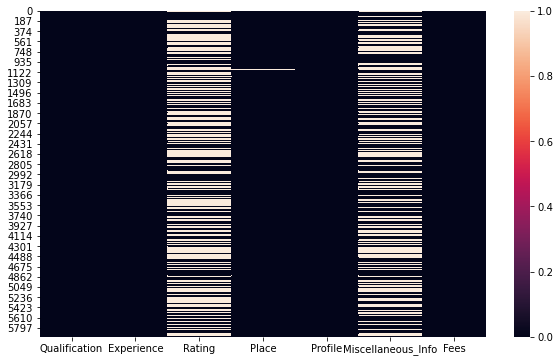

In [10]:
# checking nulls with Visuals.
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

In [11]:
# checking uniqueness in Profile
df["Profile"].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [12]:
#check the describe
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


Observation: As only integer is fees in the columns 
    
    
    

Minimum fees is 5 rupee and max is 950 

standard deviation is bit large 

# Handling the null values

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
# As the data type is object so we will use most frequent strategy 
si=SimpleImputer(strategy='most_frequent')

In [15]:
df["Rating"]=si.fit_transform(df["Rating"].values.reshape(-1,1))
df["Place"]=si.fit_transform(df["Place"].values.reshape(-1,1))

In [16]:
# miscellaneous info is not that important so we will drop it
df.drop('Miscellaneous_Info',axis=1)

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,250
...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,300
5957,MBBS,33 years experience,100%,"Nungambakkam, Chennai",General Medicine,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,100


In [17]:
#making rating into string
df['Rating'] = df['Rating'].str.slice(stop=-1).astype(int)


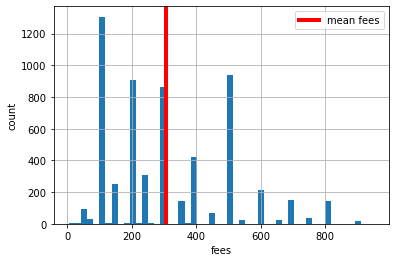

In [18]:
#checking mean fees
fees=df["Fees"].hist(bins=50)
mean_val=np.mean(df["Fees"])
plt.axvline(mean_val,linewidth=4,color='red',label='mean fees')
plt.xlabel('fees')
plt.ylabel('count')
plt.legend()
plt.show()

Observation: Mean fees is 300 ruppes 

major count of fees is 100 ruppes 

# Visualization

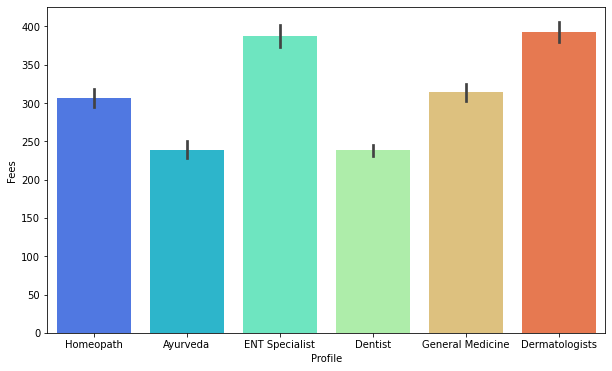

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x='Profile',y="Fees",data=df,palette='rainbow')
plt.show()

Observation: EnT specialist and Dermatologists are charging more than others

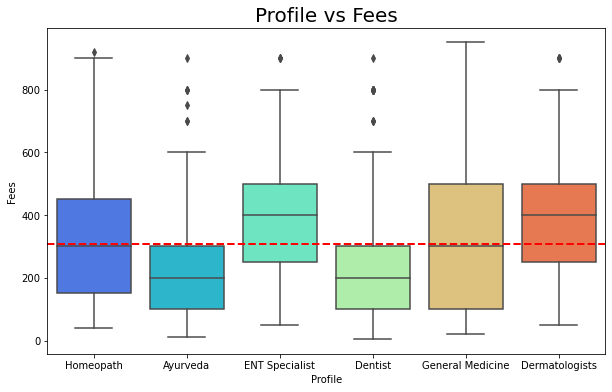

In [20]:
plt.figure(figsize=(10,6))
mean_fees=np.mean(df["Fees"])
sns.boxplot(x='Profile',y="Fees",data=df,palette='rainbow')
plt.axhline(mean_fees,color='r',linestyle='dashed',linewidth=2)
plt.title("Profile vs Fees",fontsize=20)
plt.show()

Obsevation:Mean fees is 300 rupees for all profile.

there are some outliers present in Ayurveda, Dentist and ENT specialist 

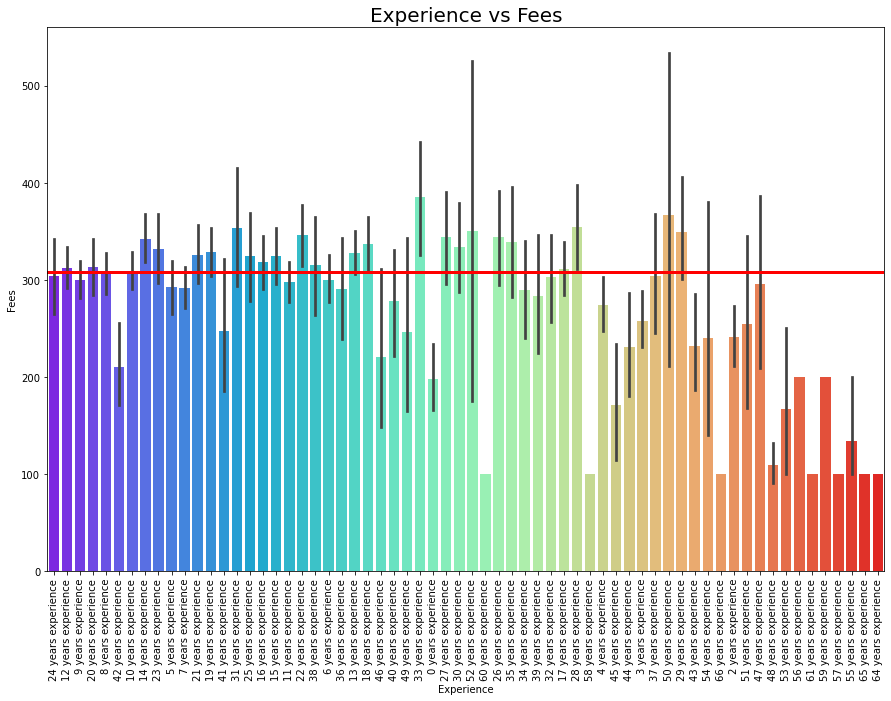

In [21]:
#check Experience and fees. 
plt.figure(figsize=(15,10))
mean_fees=np.mean(df['Fees'])
sns.barplot(x='Experience',y="Fees",data=df,palette='rainbow')
plt.axhline(mean_fees,color='r',linewidth=3)
plt.xticks(rotation=90)
plt.title("Experience vs Fees",fontsize=20)
plt.show()

Observation:Experience more than 55 years charges very less i.e is 100 rupees 


Experience between age 20 and 50 cost more than average

In [22]:
# coverting experience dtype to int.
df['Experience']=df['Experience'].apply(lambda x:int(x[:x.find('y')].strip()))

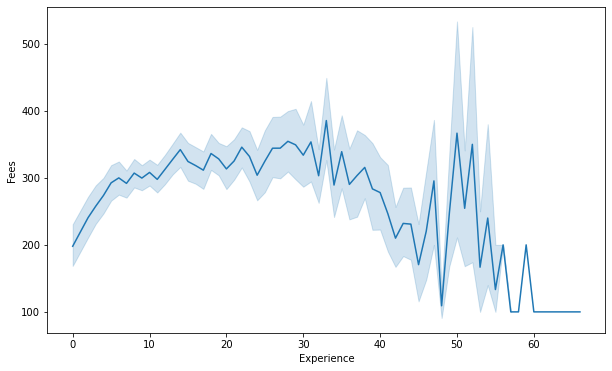

In [23]:
#check line plot for experience and fees 
plt.figure(figsize=(10,6))
sns.lineplot(x='Experience',y='Fees',data=df)
plt.show()

In [24]:
df['Place'].value_counts()

HSR Layout, Bangalore            100
Andheri West, Mumbai              70
Dwarka, Delhi                     67
Banjara Hills, Hyderabad          64
Mulund West, Mumbai               54
                                ... 
Agaram, Chennai                    1
West Of Chord Road, Bangalore      1
Saraswati Vihar, Delhi             1
Nettoor, Ernakulam                 1
Srirampuram, Bangalore             1
Name: Place, Length: 877, dtype: int64

In [25]:
#As there is more than one name in place its difficult to understand. so making place in one representation so we can understand
def place_impute(x):
    if pd.isnull(x) == True:
        return x
    else:
        return x[x.find(',')+1:].strip()

In [26]:
df['Place']=df.apply(lambda x : place_impute(x['Place']),axis=1)

In [27]:
df['Place'].value_counts()

Bangalore             1283
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
e                        1
Sector 5, Delhi          1
Name: Place, dtype: int64

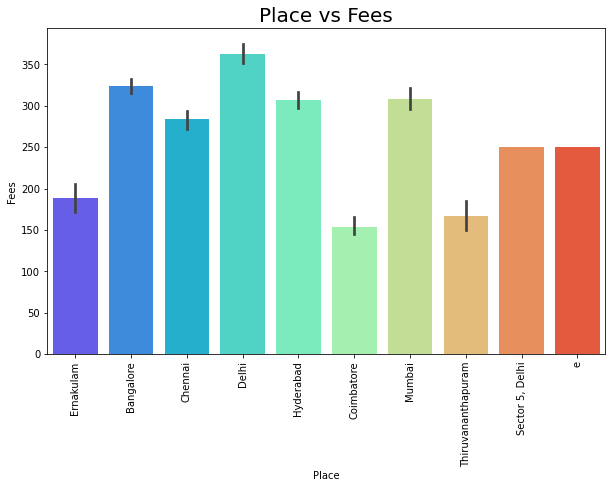

In [28]:
#checking barplot for place and fees
plt.figure(figsize=(10,6))
sns.barplot(x='Place',y='Fees',palette='rainbow',data=df)
plt.xticks(rotation=90)
plt.title("Place vs Fees",fontsize=20)
plt.show()

Observation: High fees is charged in Delhi  

Less fees is charge in Coimbatore

In [29]:
#sns.countplot(x=Place,y=Profile)

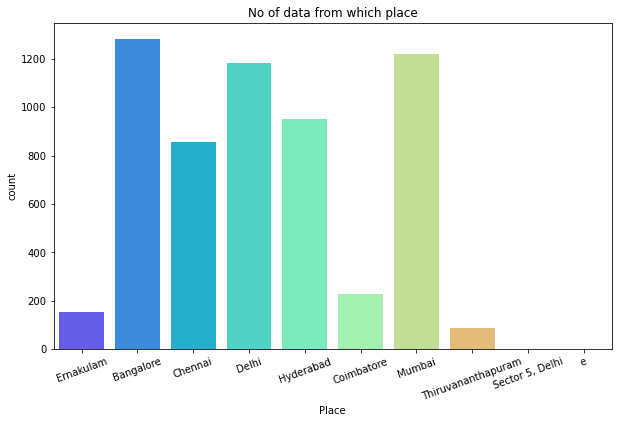

In [30]:
#counting amount of data from places.
plt.figure(figsize=(10,6))
sns.countplot(x='Place',data=df,palette='rainbow')
plt.title("No of data from which place")
plt.xticks(rotation=20)
plt.show()

Observation:High number of data coming from Banglore

Lowest is coming from sector 5 delhi

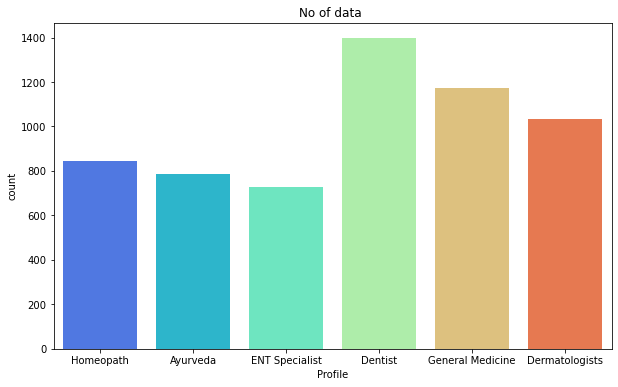

In [31]:
#checking profile count from the data
plt.figure(figsize=(10,6))
sns.countplot(x='Profile',data=df,palette='rainbow')
plt.title("No of data ")
plt.show()

Observation: Maximum number of data belongs to Dentist.

In [32]:
# no we will drop Miscellanous info as it is not important
df.drop('Miscellaneous_Info',axis=1,inplace=True)

In [33]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,100,Ernakulam,Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12,98,Bangalore,Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9,100,Bangalore,ENT Specialist,300
3,"BSc - Zoology, BAMS",12,100,Bangalore,Ayurveda,250
4,BAMS,20,100,Chennai,Ayurveda,250


In [34]:
# now we will convert Profile and place in numeric data.
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()

In [36]:
df["Place"]=le.fit_transform(df["Place"])

In [37]:
df["Profile"]=le.fit_transform(df["Profile"])

In [38]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24,100,4,5,100
1,"BAMS, MD - Ayurveda Medicine",12,98,0,0,350
2,"MBBS, MS - Otorhinolaryngology",9,100,0,3,300
3,"BSc - Zoology, BAMS",12,100,0,0,250
4,BAMS,20,100,1,0,250


In [39]:
df.dtypes

Qualification    object
Experience        int64
Rating            int32
Place             int32
Profile           int32
Fees              int64
dtype: object

Almost all data is converted in to int expect Qualification.

In [40]:
#same we do for qualification as we did for places
def qual(x):
    if ',' in x:
        return x[:x.find(',')].strip()
    else:
        return x

In [41]:
df['Qualification_Degree']=df.apply(lambda x:qual(x['Qualification']),axis=1)

In [42]:
df['Qualification_Degree'].value_counts()

MBBS                                           2448
BDS                                            1208
BAMS                                            711
BHMS                                            706
MD - Dermatology                                146
                                               ... 
FRCS - General Surgery                            1
MD - Pulmonary Medicine                           1
Post Graduate Diploma in Diabetology (PGDD)       1
DNB - General Surgery                             1
Fellowship In Clinical Cosmetology                1
Name: Qualification_Degree, Length: 150, dtype: int64

In [43]:
def qual2(x):
    if '-' in x:
        return x[:x.find('-')].strip()
    else:
        return x

In [44]:
df['Qualification_Degree']=df.apply(lambda x:qual2(x['Qualification_Degree']),axis=1)

In [45]:
df['Qualification_Degree']=df['Qualification_Degree'].apply(lambda x:x.upper())

In [46]:
df['Qualification_Degree'].value_counts()

MBBS                                         2448
BDS                                          1208
BAMS                                          711
BHMS                                          706
MD                                            327
                                             ... 
DIPLOMA IN MEDICAL TRICHOLOGY                   1
DIPLOMA IN SKIN & VINEREAL DISEASE              1
MEMBER OF THE ROYAL COLLEGE OF PHYSICIANS       1
CERTIFICATION IN AESTHETIC DENTISTRY            1
DIPLOMA IN FAMILY MEDICINE (DFM)                1
Name: Qualification_Degree, Length: 94, dtype: int64

In [47]:
df.loc[df['Qualification_Degree'].str.contains('DIPLOMA'),'Qualification_Degree']='DIPLOMA'

In [48]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees,Qualification_Degree
0,"BHMS, MD - Homeopathy",24,100,4,5,100,BHMS
1,"BAMS, MD - Ayurveda Medicine",12,98,0,0,350,BAMS
2,"MBBS, MS - Otorhinolaryngology",9,100,0,3,300,MBBS
3,"BSc - Zoology, BAMS",12,100,0,0,250,BSC
4,BAMS,20,100,1,0,250,BAMS


In [49]:
df.loc[df['Qualification_Degree'].str.contains('DIPLOMA')].head()

,Qualification,Experience,Rating,Place,Profile,Fees,Qualification_Degree
29,"Diploma in Dermatology, MBBS",15,97,3,2,500,DIPLOMA
155,DHMS (Diploma in Homeopathic Medicine and Surg...,35,100,1,5,500,DIPLOMA
192,DHMS (Diploma in Homeopathic Medicine and Surg...,27,100,0,5,500,DIPLOMA
231,DHMS (Diploma in Homeopathic Medicine and Surg...,37,100,1,5,200,DIPLOMA
236,Post Graduate Diploma in Healthcare Management...,40,100,5,4,500,DIPLOMA


In [50]:
for x in df['Qualification_Degree'].value_counts().index.tolist():
    if df[df['Qualification_Degree']==x].count()['Qualification_Degree']<10:
        df=df[df['Qualification_Degree']!=x]

In [51]:
df['Qualification_Degree'].unique()

array(['BHMS', 'BAMS', 'MBBS', 'BDS', 'MDS', 'DIPLOMA', 'MD',
       'GET INSPIRED BY REMARKABLE STORIES OF PEOPLE LIKE YOU', 'MS',
       'DDVL', 'DNB', 'LCEH'], dtype=object)

In [52]:
df=df[df['Qualification_Degree']!='GET INSPIRED BY REMARKABLE STORIES OF PEOPLE LIKE YOU']

In [53]:
df.shape

(5826, 7)

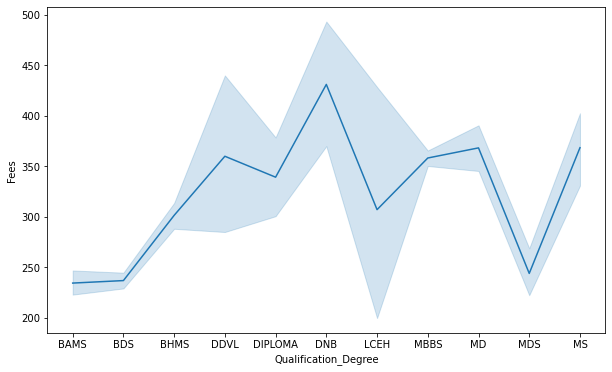

In [54]:
#line plot for qualfication and fees
plt.figure(figsize=(10,6))
sns.lineplot(x='Qualification_Degree',y='Fees',data=df)
plt.show()


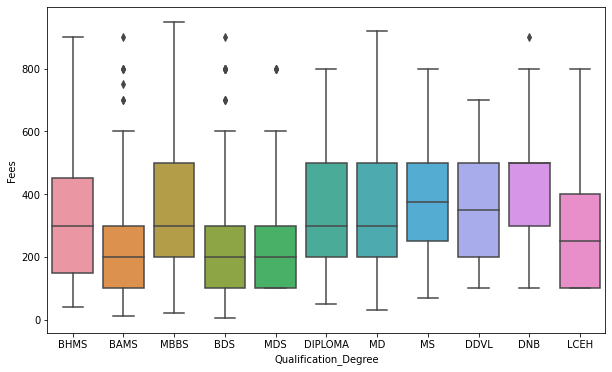

In [55]:
#boxplot for qualification and fees
plt.figure(figsize=(10,6))
sns.boxplot(x='Qualification_Degree',y='Fees',data=df)
plt.show()

Observation: most fees are taken by MBBS and MD

Least fees are taken by BAMS

In [56]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees,Qualification_Degree
0,"BHMS, MD - Homeopathy",24,100,4,5,100,BHMS
1,"BAMS, MD - Ayurveda Medicine",12,98,0,0,350,BAMS
2,"MBBS, MS - Otorhinolaryngology",9,100,0,3,300,MBBS
4,BAMS,20,100,1,0,250,BAMS
5,BAMS,8,100,1,0,100,BAMS


In [57]:
df=pd.concat([df.drop('Qualification_Degree',axis=1),pd.get_dummies(df['Qualification_Degree'])],axis=1)

In [58]:
df=df.drop('Qualification',axis=1)

In [59]:
df.head()

,Experience,Rating,Place,Profile,Fees,BAMS,BDS,BHMS,DDVL,DIPLOMA,DNB,LCEH,MBBS,MD,MDS,MS
0,24,100,4,5,100,0,0,1,0,0,0,0,0,0,0,0
1,12,98,0,0,350,1,0,0,0,0,0,0,0,0,0,0
2,9,100,0,3,300,0,0,0,0,0,0,0,1,0,0,0
4,20,100,1,0,250,1,0,0,0,0,0,0,0,0,0,0
5,8,100,1,0,100,1,0,0,0,0,0,0,0,0,0,0


In [60]:
df.shape

(5826, 16)

In [61]:
# importing zscore
from scipy.stats import zscore
z=np.abs(zscore(df))

In [62]:
z

array([[0.60198139, 0.41234742, 0.39960784, ..., 0.2438552 , 0.17178625,
        0.13872356],
       [0.48222715, 0.0653144 , 1.32141619, ..., 0.2438552 , 0.17178625,
        0.13872356],
       [0.75327929, 0.41234742, 1.32141619, ..., 0.2438552 , 0.17178625,
        0.13872356],
       ...,
       [2.13794349, 0.10820211, 0.03064817, ..., 0.2438552 , 0.17178625,
        0.13872356],
       [0.21117502, 1.32281768, 1.26011985, ..., 0.2438552 , 0.17178625,
        0.13872356],
       [0.03047359, 0.41234742, 0.03064817, ..., 0.2438552 , 0.17178625,
        0.13872356]])

In [63]:
#removing outliers
df=df[((z<3) & (z>-3)).all(axis=1)]

In [64]:
df.shape

(4887, 16)

In [65]:
#droping the values
df=df.drop(['DDVL','DIPLOMA','DNB','LCEH','LCEH','MD','MDS','MS'],axis=1)

In [66]:
df.head()

,Experience,Rating,Place,Profile,Fees,BAMS,BDS,BHMS,MBBS
0,24,100,4,5,100,0,0,1,0
1,12,98,0,0,350,1,0,0,0
2,9,100,0,3,300,0,0,0,1
4,20,100,1,0,250,1,0,0,0
5,8,100,1,0,100,1,0,0,0


In [67]:
df.skew()

Experience    0.913536
Rating       -2.585574
Place         0.075147
Profile       0.125280
Fees          0.755347
BAMS          2.020879
BDS           1.176316
BHMS          2.032687
MBBS          0.139938
dtype: float64

In [68]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [69]:
for x in df.columns.drop('Fees'):
    if abs(df.loc[:,x].skew())>0.55:
        df.loc[:,x]=pt.fit_transform(df.loc[:,x].values.reshape(-1,1))

In [70]:
df.skew()

Experience   -0.001539
Rating       -1.046877
Place         0.075147
Profile       0.125280
Fees          0.755347
BAMS          2.020879
BDS           1.176316
BHMS          2.032687
MBBS          0.139938
dtype: float64

Model Making

In [71]:
x=df.drop('Fees',axis=1)
y=df['Fees']

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=55)

In [73]:
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predict=ad.predict(x_test)

In [74]:
param={'n_estimators':[50,80,100,120,150,170,230,250,270,310]}
gscv=GridSearchCV(AdaBoostRegressor(),param)

In [75]:
gscv.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'n_estimators': [50, 80, 100, 120, 150, 170, 230, 250,
                                          270, 310]})

In [76]:
gscv.best_params_

{'n_estimators': 270}

In [77]:
mean_absolute_error(y_test,predict)

144.62864574890204

In [78]:
lr=LinearRegression()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
rfr=RandomForestRegressor()
svr=SVR()

In [79]:
models=[]
models.append(("LinearRegression",lr))
models.append(("DecisionTreeRegressor",dtr))
models.append(("KNeighborsRegressor",knr))
models.append(("RandomForestRegressor",rfr))
models.append(("SVR",svr))

In [80]:
Model=[]
r2score=[]
ae=[]
MSE=[]
rms=[]
for name, model in models:
    print(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    model.score(x_train, y_train)
    print('r2score',r2_score(y_test, pre))
    r2score.append(r2_score(y_test,pre))
    print('Mean absolute error:', mean_absolute_error(y_test, pre))
    ae.append((mean_absolute_error(y_test, pre)))
    print('Mean squared error:', mean_squared_error(y_test, pre))
    MSE.append((mean_squared_error(y_test, pre)))
    print("\n")

LinearRegression
r2score 0.12509838453388955
Mean absolute error: 140.60935798873928
Mean squared error: 30334.753931668813


DecisionTreeRegressor
r2score -0.3643565260643966
Mean absolute error: 160.0810424231689
Mean squared error: 47305.22696678357


KNeighborsRegressor
r2score 0.05718620521362505
Mean absolute error: 139.46782393056418
Mean squared error: 32689.417830130194


RandomForestRegressor
r2score -0.006975204283990788
Mean absolute error: 144.51137531765147
Mean squared error: 34914.034329417715


SVR
r2score 0.0396900911347543
Mean absolute error: 142.7955548572665
Mean squared error: 33296.046399515326




In [81]:
np.sqrt(mean_squared_error(y_test,predict))

175.62739170654206

In [123]:
#Save the model
filename='doc_fees_model.sav'
pickle.dump(model, open(filename, 'wb'))

# Testing

In [83]:
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [84]:
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

Observation:rating and place ,Miscellaneous has null values 

In [85]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [88]:
df_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [89]:
df_test.shape

(1987, 6)

In [90]:
# lets drop miscellaneous
df_test.drop('Miscellaneous_Info',axis=1,inplace=True)

In [96]:
# filling nan values
df_test["Rating"]=si.fit_transform(df_test["Rating"].values.reshape(-1,1))
df_test["Place"]=si.fit_transform(df_test["Place"].values.reshape(-1,1))

In [97]:
df_test.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
dtype: int64

In [98]:
# coverting object into numeric

In [101]:
# coverting experience dtype to int.
df_test['Experience']=df_test['Experience'].apply(lambda x:int(x[:x.find('y')].strip()))

In [102]:
df_test["Place"]=le.fit_transform(df_test["Place"])
df_test["Profile"]=le.fit_transform(df_test["Profile"])


In [104]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  1987 non-null   object
 1   Experience     1987 non-null   int64 
 2   Rating         1987 non-null   object
 3   Place          1987 non-null   int32 
 4   Profile        1987 non-null   int32 
dtypes: int32(2), int64(1), object(2)
memory usage: 62.2+ KB


In [105]:
#making rating into string
df_test['Rating'] = df_test['Rating'].str.slice(stop=-1).astype(int)


In [106]:
df_test['Qualification_Degree']=df_test.apply(lambda x:qual(x['Qualification']),axis=1)

In [107]:
df_test['Qualification_Degree']=df_test.apply(lambda x:qual2(x['Qualification_Degree']),axis=1)

In [108]:
df_test['Qualification_Degree']=df_test['Qualification_Degree'].apply(lambda x:x.upper())

In [110]:
df_test.loc[df_test['Qualification_Degree'].str.contains('DIPLOMA'),'Qualification_Degree']='DIPLOMA'

In [112]:
df_test.loc[df_test['Qualification_Degree'].str.contains('DIPLOMA')].head()

,Qualification,Experience,Rating,Place,Profile,Qualification_Degree
89,Post Graduate Diploma in Diabetology (PGDD)(Ma...,16,100,366,4,DIPLOMA
286,DHMS (Diploma in Homeopathic Medicine and Surg...,19,100,182,5,DIPLOMA
363,"Diploma in Otorhinolaryngology (DLO), Ph. D - ...",20,92,25,3,DIPLOMA
395,DHMS (Diploma in Homeopathic Medicine and Surg...,20,100,300,5,DIPLOMA
501,"Diploma in Otorhinolaryngology (DLO), MS - ENT...",18,91,347,3,DIPLOMA


In [114]:
df_test['Qualification_Degree'].unique()

array(['MBBS', 'BAMS', 'BDS', 'MD', 'BHMS', 'MS', 'BSC',
       'FELLOWSHIP IN AESTHETIC MEDICINE', 'MDS', 'LCEH', 'DM', 'DIPLOMA',
       'CERTIFICATE IN DENTAL IMPLANTS', 'B.SC', 'DVD', 'DDVL', 'DNB',
       'DOCTOR OF HOMEOPATHIC MEDICINE (HMD)', 'FRCP', 'BSAM',
       'GET INSPIRED BY REMARKABLE STORIES OF PEOPLE LIKE YOU',
       'M.S. (AYURVED) STRI ROGA & PRASUTI TANTRA', 'DO', 'FRCS', 'FWFO',
       'DMS', 'POST GRADUATE CERTIFICATE IN ENDODONTICS (PGCE)',
       'BPTH/BPT', 'FAMS', 'M.D. (AYU.)', 'PHD', 'FICD', 'DEHM', 'MRCGP',
       'FPFA', 'DHMS', 'MRCS (UK)', 'MRCP (UK)',
       'CERTIFICATION IN AESTHETIC DENTISTRY', 'DPM (PSYCHIATRY)'],
      dtype=object)

In [115]:
for x in df_test['Qualification_Degree'].value_counts().index.tolist():
    if df_test[df_test['Qualification_Degree']==x].count()['Qualification_Degree']<10:
        df_test=df_test[df_test['Qualification_Degree']!=x]

In [116]:
df_test['Qualification_Degree'].unique()

array(['MBBS', 'BAMS', 'BDS', 'MD', 'BHMS', 'MS', 'MDS', 'DIPLOMA',
       'DDVL', 'DNB'], dtype=object)

In [127]:
df_test=pd.concat([df_test.drop('Qualification_Degree',axis=1),pd.get_dummies(df_test['Qualification_Degree'])],axis=1)

In [129]:
df_test=df_test.drop('Qualification',axis=1)

In [130]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1937 entries, 0 to 1986
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Experience  1937 non-null   int64
 1   Rating      1937 non-null   int32
 2   Place       1937 non-null   int32
 3   Profile     1937 non-null   int32
 4   BAMS        1937 non-null   uint8
 5   BDS         1937 non-null   uint8
 6   BHMS        1937 non-null   uint8
 7   DDVL        1937 non-null   uint8
 8   DIPLOMA     1937 non-null   uint8
 9   DNB         1937 non-null   uint8
 10  MBBS        1937 non-null   uint8
 11  MD          1937 non-null   uint8
 12  MDS         1937 non-null   uint8
 13  MS          1937 non-null   uint8
dtypes: int32(3), int64(1), uint8(10)
memory usage: 71.9 KB


In [131]:
load_ad_model =pickle.load(open(filename, 'rb'))

In [135]:
#droping the values
df_test=df_test.drop(['DDVL','DIPLOMA','DNB','MD','MDS','MS'],axis=1)

In [139]:
y_predit=load_ad_model.predict(df_test)

In [140]:
y_predit

array([234.0001153, 234.0001153, 234.0001153, ..., 234.0001153,
       234.0001153, 234.0001153])

In [159]:
sec_y_test= np.power(y_load_predit, 3)

In [160]:
df_test['Fees'] = sec_y_test

In [161]:
predi_fees = pd.DataFrame(columns=['Fees'])

In [162]:
predi_fees['Fees']= df_test['Fees']

In [163]:
predi_fees.head()

,Fees
0,1.281292e+07
1,1.281292e+07
2,1.281292e+07
3,1.281292e+07
4,1.281292e+07
